In [6]:
import numpy as np
from pyvtk import VtkData, StructuredPoints, PointData, Scalars
import pyvista as pv
import imageio
import plotly.graph_objects as go
import matplotlib.pyplot as plt


def export_to_vtk(u, filename):
    # Ensure u is a numpy array and has the right type
    u = np.asarray(u, dtype=float)

    # Dimensions of the 3D grid
    nx, ny, nz = u.shape

    # Create a structured grid
    # Note: VTK's coordinate system may differ; you might need to transpose the array
    vtk_data = VtkData(
        StructuredPoints((nx, ny, nz)),
        PointData(Scalars(u.transpose().ravel(), name="Temperature")),
    )

    # Save the VTK file
    vtk_data.tofile(filename, "binary")

    # Load the VTK file
    grid = pv.read(f"{filename}.vtk")

    # Create a plotter and add the grid
    plotter = pv.Plotter(notebook=True)
    plotter.add_volume(grid, scalars="Temperature", cmap="coolwarm")

    # Show the plot
    plotter.show()


def plot_and_export_3d(u, export_path):
    # Ensure u is a numpy array and has the right type
    u = np.asarray(u, dtype=float)

    # Dimensions of the 3D grid
    nx, ny, nz = u.shape

    # Create a structured grid
    # Note: VTK's coordinate system may differ; you might need to transpose the array
    vtk_data = VtkData(
        StructuredPoints((nx, ny, nz)),
        PointData(Scalars(u.transpose().ravel(), name="Temperature")),
    )

    # # Save the VTK file
    # vtk_data.tofile(f'temp_plot_step', 'binary')

    # Load the VTK file
    grid = vtk_data

    # Create a plotter and add the grid
    plotter = pv.Plotter(notebook=True)
    plotter.add_volume(grid, scalars="Temperature", cmap="viridis")

    # Show the plot
    plotter.show(auto_close=False)  # Keep the window open to take a screenshot
    plotter.screenshot(f"{export_path}.png")  # Save the screenshot
    plotter.close()


def plot_and_export_3d_plotly(u, export_path):
    # Ensure u is a numpy array and has the right type
    u = np.asarray(u, dtype=float)

    X, Y, Z = np.mgrid[: u.shape[0], : u.shape[1], : u.shape[2]]

    # Create a 3D volume plot
    fig = go.Figure(
        data=go.Volume(
            x=np.repeat(np.arange(u.shape[0]), u.shape[1] * u.shape[2]),
            y=np.tile(np.repeat(np.arange(u.shape[1]), u.shape[2]), u.shape[0]),
            z=np.tile(np.arange(u.shape[2]), u.shape[0] * u.shape[1]),
            # x=X.flatten(),
            # y=Y.flatten(),
            # z=Z.flatten(),
            value=u.ravel(),
            opacity=0.1,  # Adjust opacity for better visualization
            surface_count=20,  # Number of isosurfaces to display
            colorscale="Viridis",
        )
    )

    # Update layout and export as PNG
    fig.update_layout(scene=dict(aspectmode="cube"))
    fig.write_image(f"{export_path}.png")
    # fig.show()

    # image = imageio.imread(f"{export_path}.png")
    # plt.imshow(image)
    # plt.axis("off")  # Hide axes
    # plt.show()


def gen_gif(base_path, append_paths):
    images = []
    for append_path in append_paths:
        image_path = f"{base_path}_{append_path}.png"
        images.append(imageio.imread(image_path))
    imageio.mimsave(
        "gif_path.gif", images, fps=2, format="GIF"
    )  # fps is frames per second

(6, 7, 4)
simulated for time 0.001
simulated for time 0.05100000000000004
range(1, 1)
simulated for time 0.10100000000000008
simulated for time 0.1510000000000001
range(1, 1)
simulated for time 0.20100000000000015
simulated for time 0.25100000000000017
range(1, 1)
simulated for time 0.3010000000000002
simulated for time 0.35100000000000026
range(1, 1)
simulated for time 0.4010000000000003
simulated for time 0.45100000000000035
range(1, 1)
simulated for time 0.5010000000000003
simulated for time 0.5510000000000004
range(1, 1)
simulated for time 0.6010000000000004
simulated for time 0.6510000000000005
range(1, 1)
simulated for time 0.7010000000000005
simulated for time 0.7510000000000006
range(1, 1)
simulated for time 0.8010000000000006
simulated for time 0.8510000000000006
range(1, 1)
simulated for time 0.9010000000000007
simulated for time 0.9510000000000007
simulated for time 1.0010000000000006
simulated for time 1.050999999999995
simulated for time 1.1009999999999895
range(1, 1)
simu

D:\Temp\ipykernel_1704\691869392.py:104: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



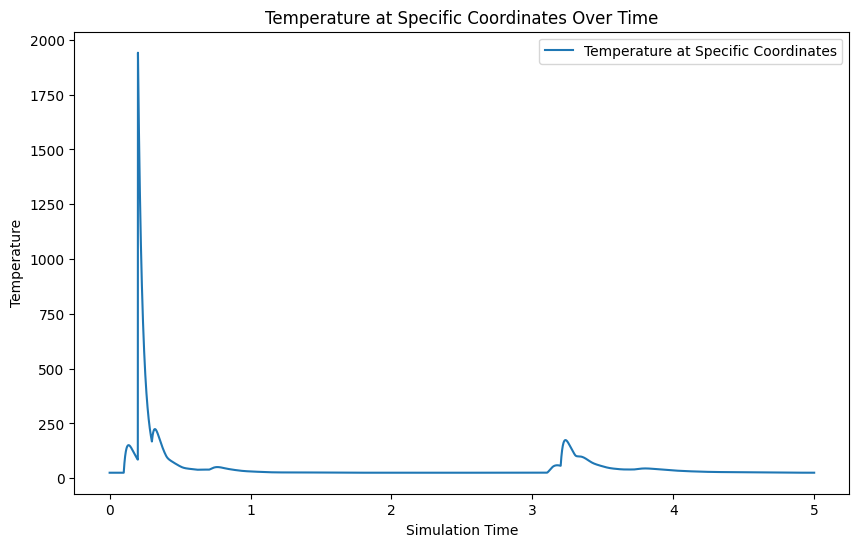

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# enable some thing so pyvista could work
# pv.start_xvfb()

points = [
    (0, 0, 0, 0.1),
    (0, 1, 0, 0.2),
    (0, 2, 0, 0.3),
    (0, 3, 0, 0.4),
    (1, 3, 0, 0.5),
    (2, 2, 0, 0.6),
    (2, 1, 0, 0.7),
    (3, 1, 0, 0.8),
    (3, 2, 0, 0.9),
    (3, 3, 0, 1.1),
    (3, 4, 0, 1.2),
    (2, 4, 0, 1.3),
    (0, 0, 1, 3.1),
    (0, 1, 1, 3.2),
    (0, 2, 1, 3.3),
    (0, 3, 1, 3.4),
    (1, 3, 1, 3.5),
    (2, 2, 1, 3.6),
    (2, 1, 1, 3.7),
    (3, 1, 1, 3.8),
    (3, 2, 1, 3.9),
    (3, 3, 1, 4.0),
    (3, 4, 1, 4.1),
    (2, 4, 1, 4.2),
]

# Grid parameters
# length, width, height = 0.21, 0.31, 0.41  # dimensions of the rod. add 0.01 for di
dx, dy, dz = 0.1, 0.1, 0.1  # grid spacing in x, y, z
dt = 0.001  # time step

time = 0
end_time = 5

# Initial conditions
initial_temp = 2000
air_temp = 25
cold_end_temp = 0

# Material properties
k = 0.05  # thermal conductivity

if dt > 1 / (2 * k * (1 / dx / dx + 1 / dy / dy + 1 / dz / dz)):
    dt = 1 / (2 * k * (1 / dx / dx + 1 / dy / dy + 1 / dz / dz))
    print(f"Adjusted dt for stability. New value dt={dt}")

nx = ny = nz = 0
# Set to maximum
for point in points:
    x, y, z, t = point  # Unpack each point into x, y, z, t
    if x > nx:
        nx = x
    if y > ny:
        ny = y
    if z > nz:
        nz = z
# Concidering that indices start from 0 and we need sizes
nx += 1
ny += 1
nz += 1


simulation_height = 0

u = air_temp * np.ones((nx + 2, ny + 2, nz + 2))

print(u.shape)


# Apply boundary conditions
# Cold end boundary condition (example: all faces at one end)
# Air temperature boundary condition (example: all faces at the opposite end)
u[0, :, :] = air_temp
u[:, 0, :] = air_temp
u[:, :, 0] = air_temp
u[-1, :, :] = air_temp
u[:, -1, :] = air_temp
u[:, :, -1] = air_temp


# Update temperature function for 3D
def update_temp_3d(u, dt, dx, dy, dz, k):
    u_new = u.copy()
    for i in range(1, u.shape[0] - 1):
        for j in range(1, u.shape[1] - 1):
            for l in range(1, simulation_height + 2):
                # if shape_3d[i, j, l] == 1:
                u_new[i, j, l] = u[i, j, l] + k * dt * (
                    (u[i + 1, j, l] - 2 * u[i, j, l] + u[i - 1, j, l]) / dx**2
                    + (u[i, j + 1, l] - 2 * u[i, j, l] + u[i, j - 1, l]) / dy**2
                    + (u[i, j, l + 1] - 2 * u[i, j, l] + u[i, j, l - 1]) / dz**2
                )

    return u_new


export_path = "imfg"  # Update this path
batch_paths = []

n = 0

# Initialize lists to store temperature data and corresponding simulation times
track_x, track_y, track_z = 1, 2, 1
temperature_over_time = []
time_points = []

temperature_over_time.append(u[track_x, track_y, track_z])
time_points.append(time)


# Simulation loop
while time < end_time:
    while points and (points[0][3] < time):
        x, y, z, t = points.pop(0)
        simulation_height = max(simulation_height, z)
        print(range(1, simulation_height + 1))
        u[x + 1, y + 1, z + 1] = initial_temp
    time += dt
    if n % 50 == 0:
        batch_paths.append(n)
        print(f"simulated for time {time}")
        plot_and_export_3d_plotly(u, f"{export_path}_{n}")
    n += 1
    u = update_temp_3d(u, dt, dx, dy, dz, k)
    temperature_over_time.append(u[track_x, track_y, track_z])
    time_points.append(time)


gen_gif(export_path, batch_paths)

# Plotting the temperature over time with accurate time scale
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(
    time_points, temperature_over_time, label="Temperature at Specific Coordinates"
)
plt.xlabel("Simulation Time")
plt.ylabel("Temperature")
plt.title("Temperature at Specific Coordinates Over Time")
plt.legend()
plt.show()